In [30]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, auc
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
# Load Pickled Datasets
X_train = 'D:/Python/Hydraulic Rig Dataset/Data/X_train_pickled.pkl'
X_test = 'D:/Python/Hydraulic Rig Dataset/Data/X_test_pickled.pkl'
y_train = 'D:/Python/Hydraulic Rig Dataset/Data/y_train_pickled.pkl'
y_test = 'D:/Python/Hydraulic Rig Dataset/Data/y_test_pickled.pkl'

In [3]:
X_train = pd.read_pickle(X_train)
X_test = pd.read_pickle(X_test)
y_train= pd.read_pickle(y_train)
y_test = pd.read_pickle(y_test)


In [ ]:
 # Pipeline with smote and logistic regression model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('clf', LogisticRegression(solver='liblinear', random_state=1))
])

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'clf__C': [0.01, 0.1, 1, 10],              # regularization strength
    'clf__penalty': ['l1', 'l2']               # L1 vs L2 regularization
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',   
    cv=cv,
    n_jobs=-1,
    verbose=1)

In [ ]:
# train model 
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV F1:", grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'smote__k_neighbors': 5}
Best CV F1: 0.9477293180064219


In [25]:
# training metrics
y_train_pred = grid.predict(X_train)

print("Train classification report:")
print(classification_report(y_train, y_train_pred))

# testing metrics
y_test_pred = grid.predict(X_test)


print("Test classification report:")
print(classification_report(y_test, y_test_pred))

Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00       605

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       290
           1       0.97      0.91      0.94       151

    accuracy                           0.96       441
   macro avg       0.96      0.95      0.95       441
weighted avg       0.96      0.96      0.96       441



In [ ]:
#  Get predicted probabilities for the positive class
y_train_proba = grid.predict_proba(X_train)[:, 1]
y_test_proba  = grid.predict_proba(X_test)[:, 1]

#  Compute ROC curve metrics
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba, pos_label=1)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_test_proba,  pos_label=1)

#  Compute AUC scores
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test,  tpr_test)

print(f"Train ROC AUC: {auc_train:.3f}")
print(f"Test  ROC AUC: {auc_test:.3f}")


Train ROC AUC: 1.000
Test  ROC AUC: 0.986


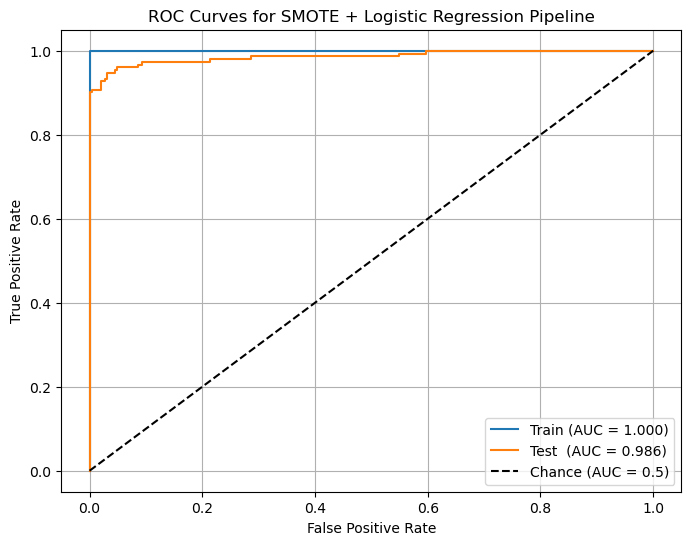

In [ ]:
#  Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train (AUC = {auc_train:.3f})")
plt.plot(fpr_test,  tpr_test,  label=f"Test  (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for SMOTE + Logistic Regression Pipeline")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()